In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from collections import Counter
import math

In [2]:
def calc_entropy(column):
    counts=np.bincount(column) # number of each unique value in a column
    probability = counts/(len(column))
    entropy = 0
    for prob in probability: 
        if prob > 0:
            entropy += prob * math.log(prob, 2) # calculate entropy of each value and add them to find the total emtropy
    return -entropy # as per formula of entropy

In [3]:
# Information gain 
def information_gain(data, split,target):
    original_entropy=calc_entropy(data[target])
    values=data[split].unique()
    left_split=data[data[split]==values[0]]
    right_split=data[data[split]==values[1]]
    subract=0
    for subset in [left_split,right_split]:
        prob=(subset.shape[0])/data.shape[0]
        subract += prob * calc_entropy(subset[target])
    return  original_entropy - subract

Saving Processed_Data.xlsx to Processed_Data.xlsx


In [4]:
df=pd.read_csv('/content/Normalized_Data.csv')
df.drop(df.iloc[:, 0:1], inplace=True, axis=1)
df

,Price,Transmission,Power,Engine CC,Fuel_2.0,Male,Female,Unknown,Total,Sale_2
0,0.042419,0.720778,0.180557,0.241168,0.0,0.808366,0.535334,1.000000,0.828183,0.0
1,0.023629,0.690355,0.121942,0.187845,0.0,0.550830,0.799941,0.956971,0.794356,0.0
2,0.043387,0.744787,0.170031,0.247649,0.0,0.479653,0.393329,0.841980,0.538530,0.0
3,0.029175,0.678407,0.138068,0.196465,0.0,0.239363,0.395801,0.495644,0.372215,0.0
4,0.069203,0.778567,0.254399,0.321485,0.0,0.404962,0.146672,0.515494,0.353719,0.0
...,...,...,...,...,...,...,...,...,...,...
6087,0.163873,0.948818,0.442011,0.371291,1.0,0.000716,0.000152,0.001186,0.000154,1.0
6088,0.062518,0.163681,0.281248,0.364239,0.0,0.000376,0.000572,0.000938,0.000139,1.0
6089,0.080631,0.724873,0.340470,0.434359,0.0,0.000496,0.000275,0.001204,0.000075,1.0
6090,0.041582,0.483249,0.217311,0.363080,0.0,0.000346,0.000489,0.000637,0.000066,1.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X = df.iloc[:, 0:5].values 
Y = df["Sale_2"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from collections import Counter
dtree = DecisionTreeRegressor()
dtree.fit(X_train,Y_train)
print("Training data accuracy: ", dtree.score(X_train, Y_train))
print("Test set accuracy: ", dtree.score(X_test,Y_test))

Training data accuracy:  0.6625534047076312
Test set accuracy:  0.6224936400038084


In [11]:
print(dtree.get_depth())

15


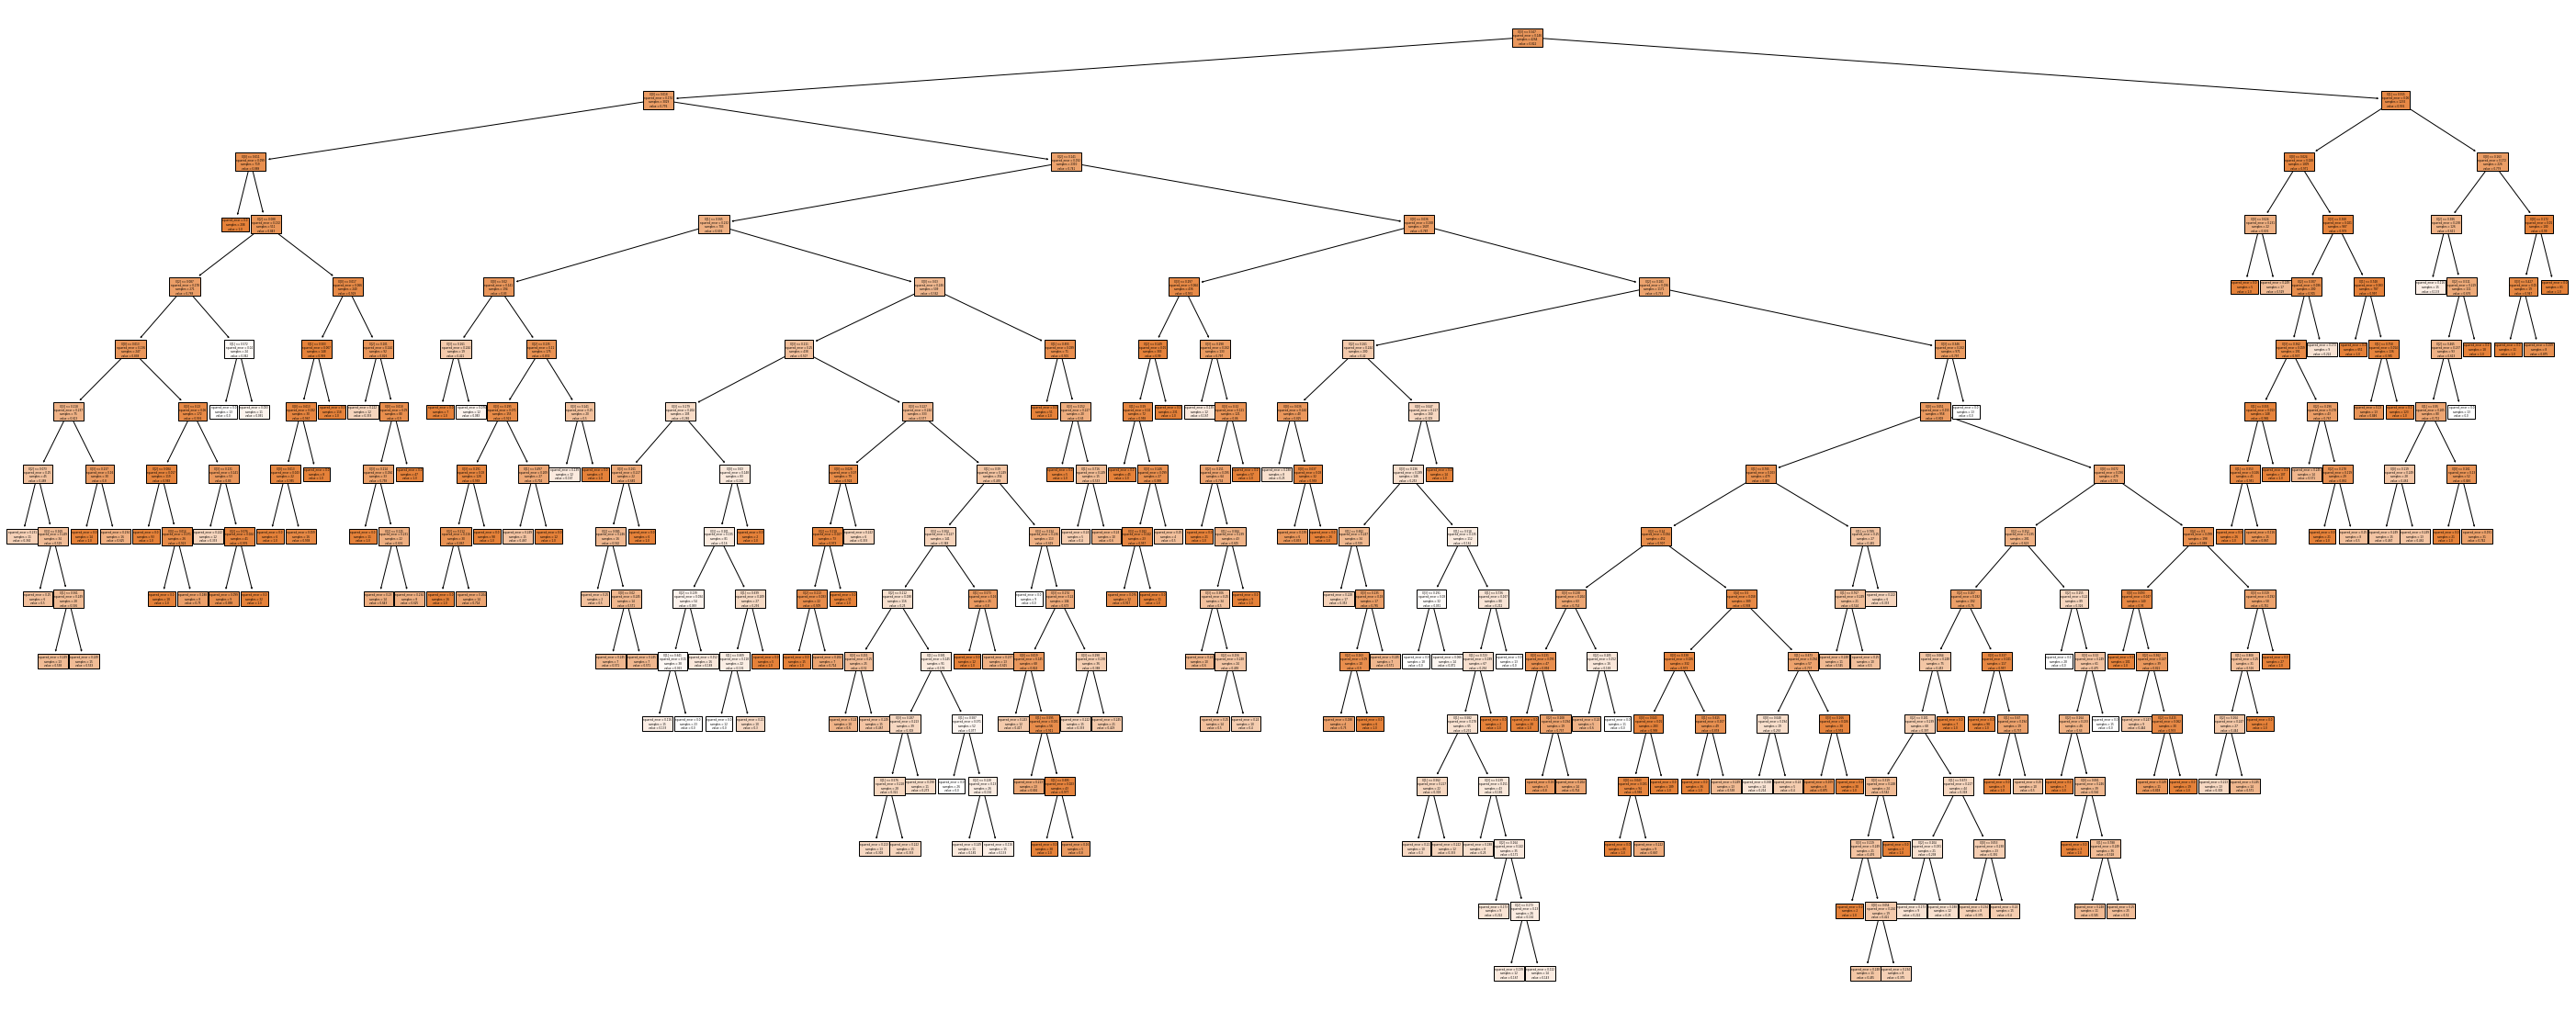

In [12]:
plt.figure(figsize=(50,20))
tree.plot_tree(dtree, filled=True)
plt.show()

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from collections import Counter
dtree2 = DecisionTreeRegressor(max_depth=30)
dtree2 = dtree2.fit(X_train,Y_train)
print("Training data accuracy: ", dtree2.score(X_train, Y_train))
print("Test set accuracy: ", dtree2.score(X_test,Y_test))
print(dtree2.get_depth())

Training data accuracy:  0.6625534047076312
Test set accuracy:  0.6224294049908068
15


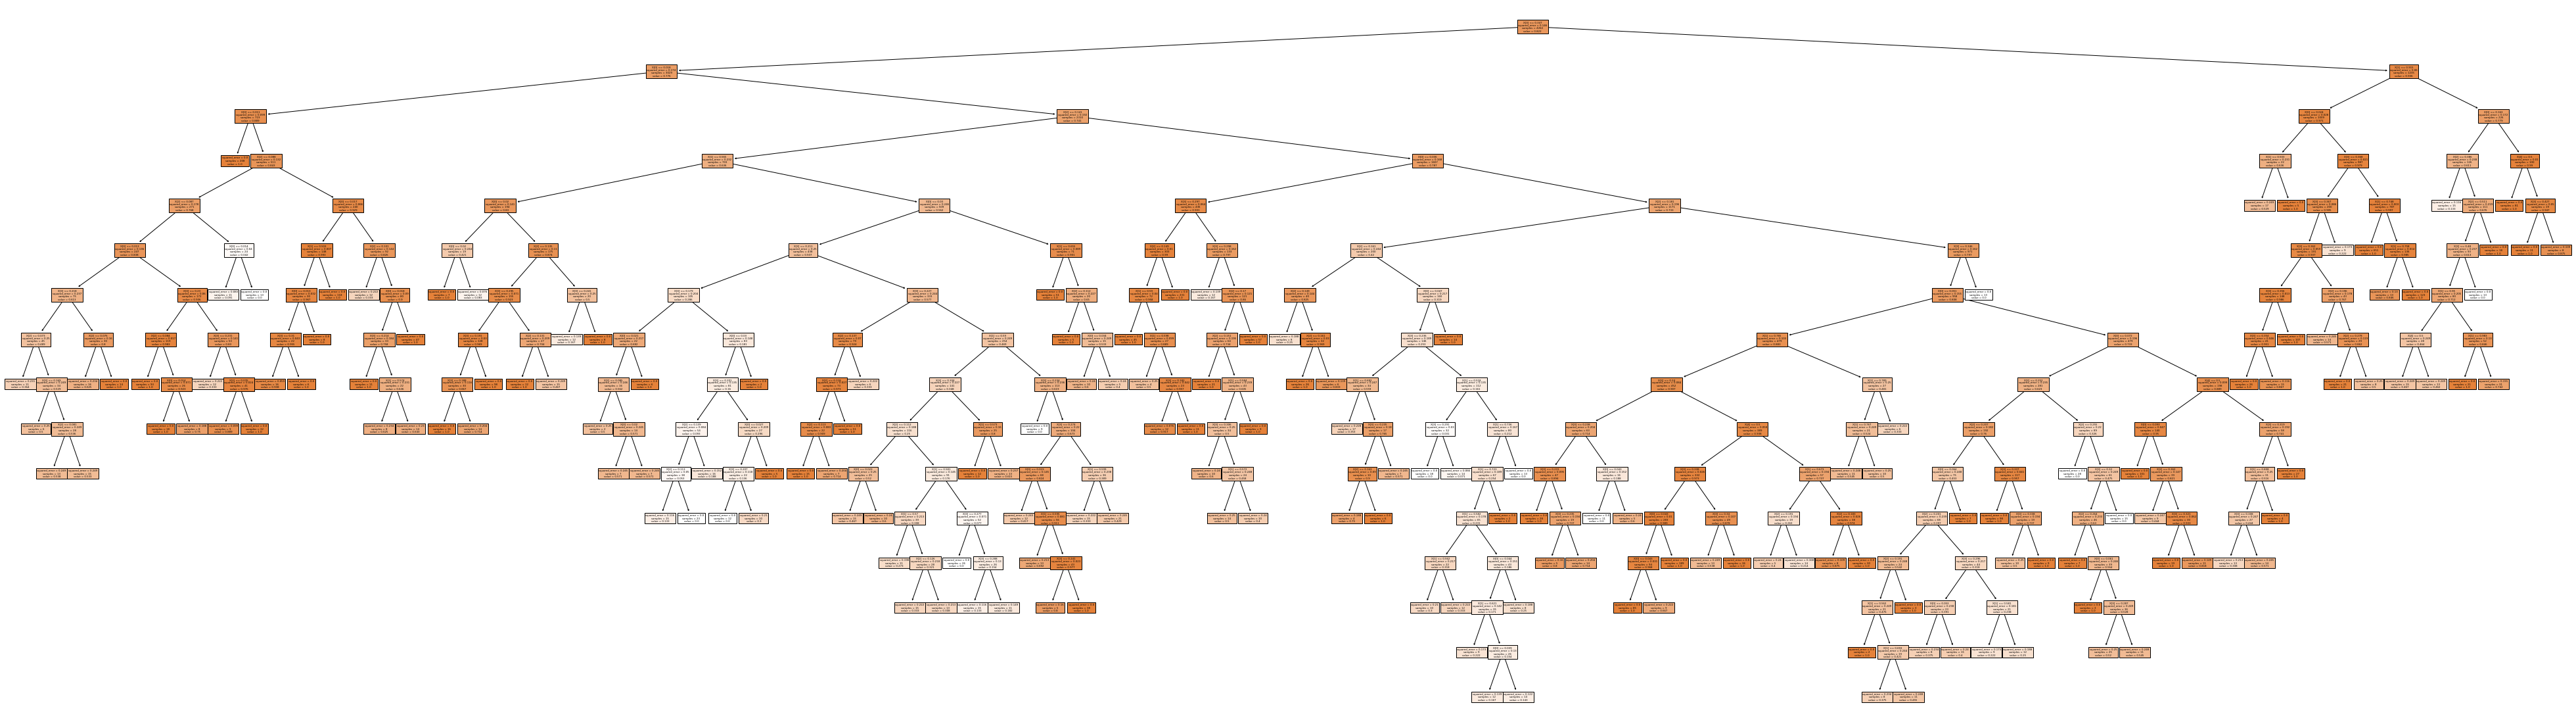

In [14]:
plt.figure(figsize=(70,20))
tree.plot_tree(dtree2, filled=True)
plt.show()

In [17]:
model3 = DecisionTreeRegressor(criterion='squared_error')
model3 = model3.fit(X_train,Y_train)
print("Training data accuracy: ", model3.score(X_train, Y_train))
print("Test data accuracy: ", model3.score(X_test,Y_test))
print("depth of tree: ",model3.get_depth())

Training data accuracy:  0.6625534047076312
Test data accuracy:  0.6224294049908068
depth of tree:  15


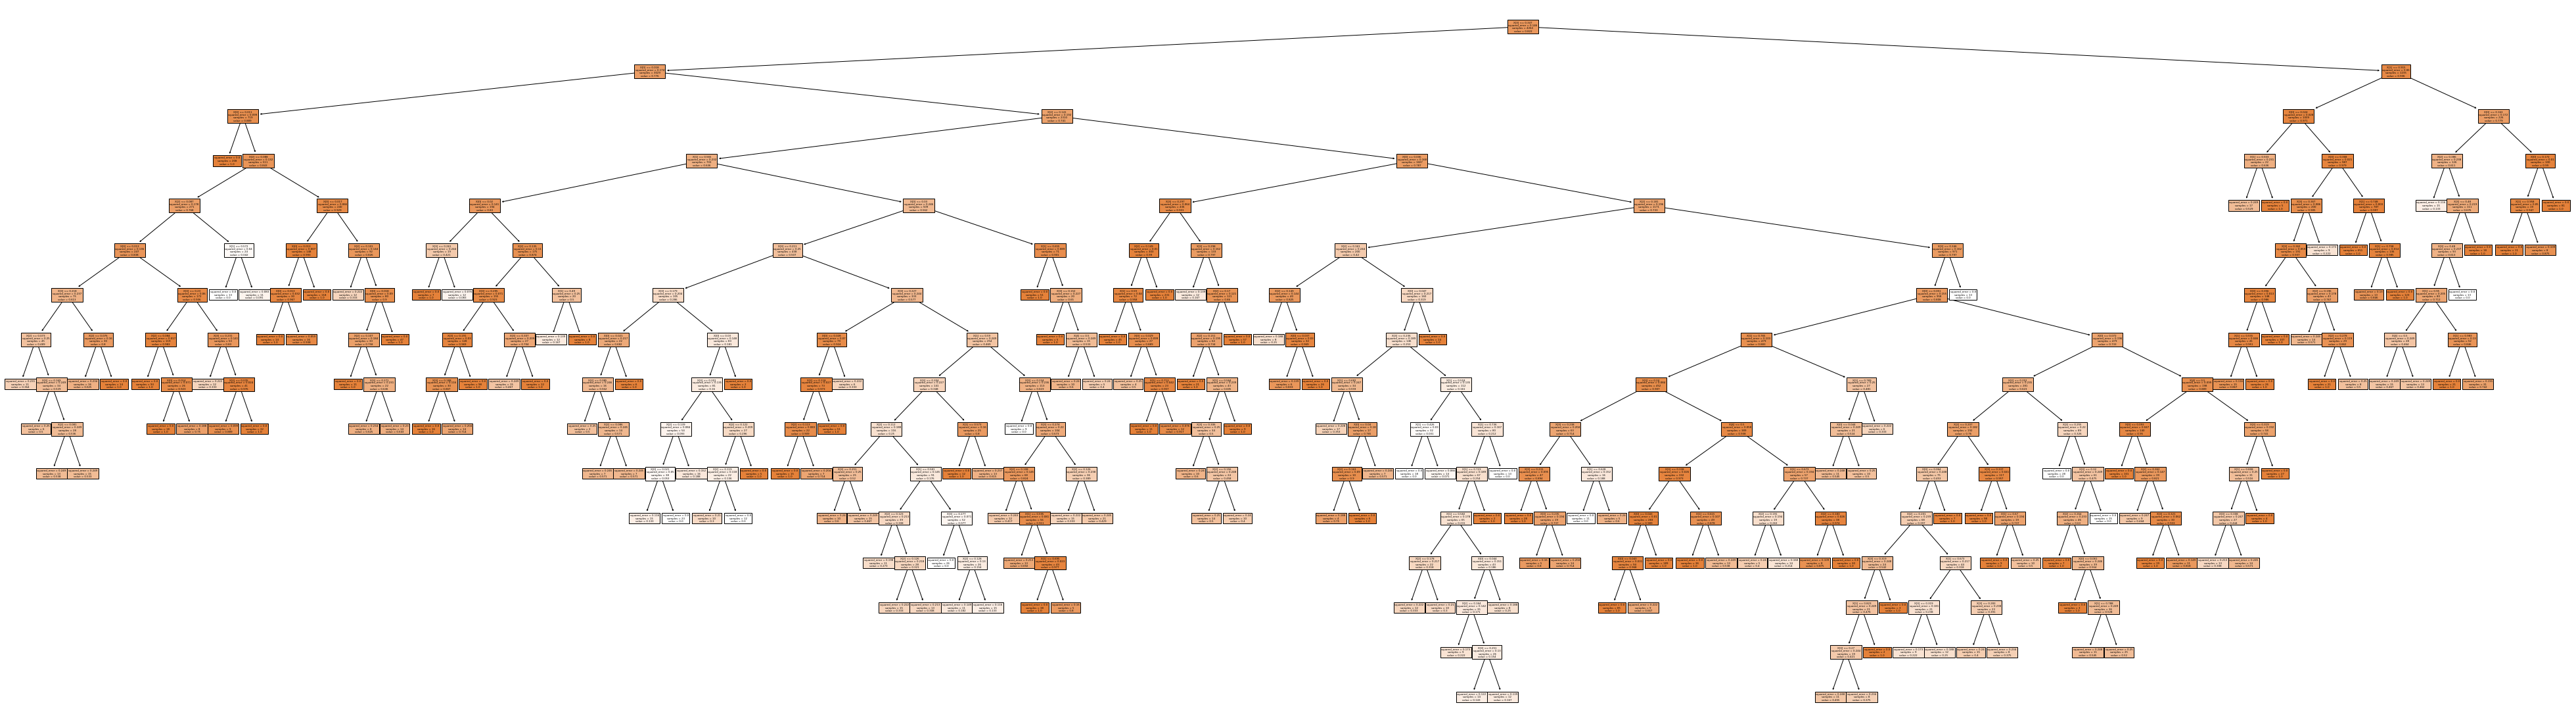

In [18]:
plt.figure(figsize=(70,20))
tree.plot_tree(model3, filled=True)
plt.show()